In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import os

In [15]:
data = np.load('../N48_D01_data.npz')
er = data['er']
ec = data['ec']
names = []
far_data = []
el_data = []
for file in os.listdir('./Saves'):
    if file[:4] == 'AVSF':
        far_data.append(np.load('./Saves/'+file )['er'][int(5e5):])
        el_data.append(np.load('./Saves/'+file )['el'][int(5e5):])
        names.append(file)

In [24]:
names

['AVSF_F.npz', 'AVSF_D.npz']

In [4]:
def compressor(array):
    comp_er = [0]
    for i in range(len(array)):
        if array[i]:
            comp_er[-1] += array[i]
        else:
            comp_er.append(0)
    return comp_er

In [10]:
def CWT(E, comp_er):
    WT = []
    indx = [i for i, v in enumerate(comp_er) if v> E]
    for i in range(1, len(indx)):
        WT.append(indx[i]-indx[i-1])
    return np.median(WT)

In [11]:
def CWT_maker(min_, max_, er):
    E_space = np.logspace(min_, max_, 100)
    comp_er = compressor(er)
    CWT_space = []
    for item in E_space:
        CWT_space.append(CWT(item, comp_er))
    CWT_space = np.array(CWT_space)
    return E_space, CWT_space

In [28]:
# E_space1, CWT_space1 = CWT_maker(-1, 10, er)
# E_space2, CWT_space2 = CWT_maker(-1, 10, ec)

far_spaces = [[],[]]
for type_ in far_data:
    E_space, CWT_space = CWT_maker(-1, 15, type_)
    far_spaces[0].append(E_space)
    far_spaces[1].append(CWT_space)
far_spaces = np.array(far_spaces)
np.savez('far_spaces.npz', far_spaces = far_spaces)

# far_spaces = np.load('far_spaces.npz')['far_spaces']

/home/hlamarre/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hlamarre/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
sunpy_CWT = np.load('sunpy_CWT.npz')
points = sunpy_CWT['points']
CWT_sunpy = sunpy_CWT['CWT'] 

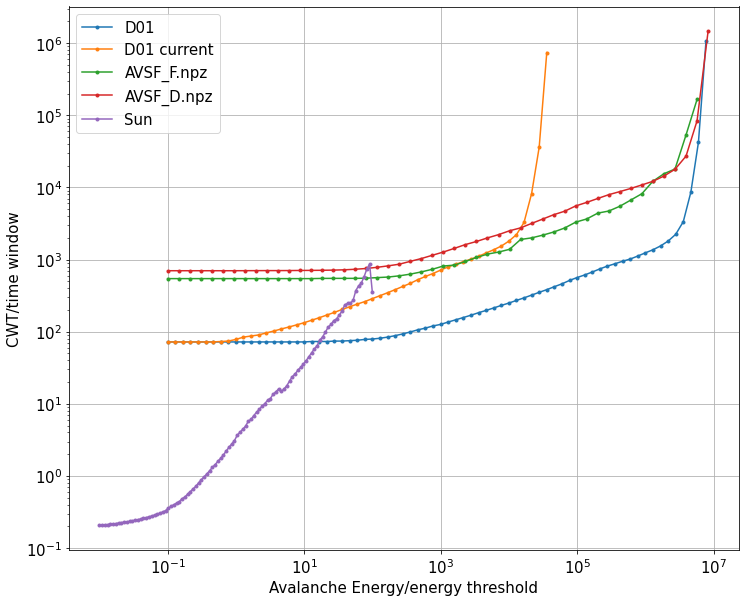

In [29]:
plt.figure()
plt.loglog(E_space1, CWT_space1, marker = '.')
plt.loglog(E_space2, CWT_space2, marker = '.')
for i in range(2):
    plt.loglog(far_spaces[0][i], far_spaces[1][i], marker = '.')
plt.loglog(points*1e5, CWT_sunpy/1e5, marker = '.')
plt.ylabel('CWT/time window', fontsize = 15)
plt.xlabel('Avalanche Energy/energy threshold', fontsize = 15)
# plt.xlim(1e-4, 1e1)
# plt.ylim(1e-2, 1e2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['D01', 'D01 current']+ names+['Sun'], fontsize = 15)
plt.grid()

In [77]:
# f1 = interp1d(E_space1, CWT_space1)
# def f1_(x, a, b):
#     return a*f1(x + min(E_space1) - min(points) + b)
# popt1, pcov1 = curve_fit(f1_, points, CWT_sunpy)
# plt.figure()
# plt.loglog(points, CWT_sunpy)
# plt.loglog(points, f1_(points, popt1[0], popt1[1]))

# Deterministic

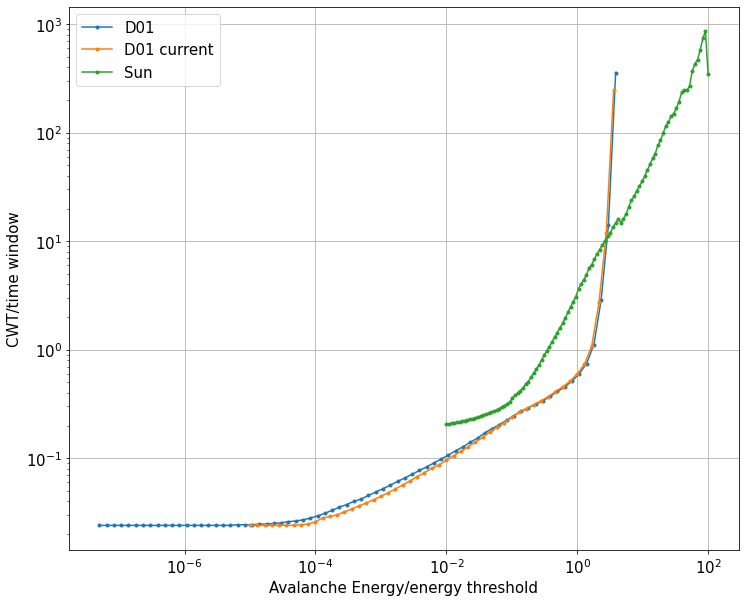

In [124]:
plt.figure()
plt.loglog(E_space1/2e6, CWT_space1/3e3, marker = '.')
plt.loglog(E_space2/1e4, CWT_space2/3e3, marker = '.')
plt.loglog(points*1e5, CWT_sunpy/1e5, marker = '.')
plt.ylabel('CWT/time window', fontsize = 15)
plt.xlabel('Avalanche Energy/energy threshold', fontsize = 15)
# plt.xlim(1e-4, 1e1)
# plt.ylim(1e-2, 1e2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['D01', 'D01 current']+ ['Sun'], fontsize = 15)
plt.grid()

# A2

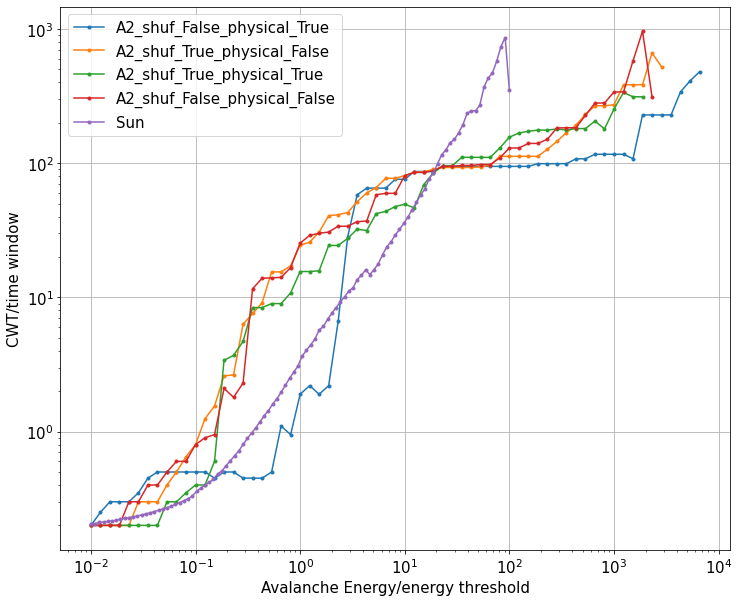

In [126]:
plt.figure()
for i in range(4):
    plt.loglog(far_spaces[0][i]/1000, far_spaces[1][i]/10, marker = '.')
plt.loglog(points*1e5, CWT_sunpy/1e5, marker = '.')
plt.ylabel('CWT/time window', fontsize = 15)
plt.xlabel('Avalanche Energy/energy threshold', fontsize = 15)
# plt.xlim(1e-4, 1e1)
# plt.ylim(1e-2, 1e2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(legend_names[:4]+ ['Sun'], fontsize = 15)
plt.grid()

# 9stencil + normal

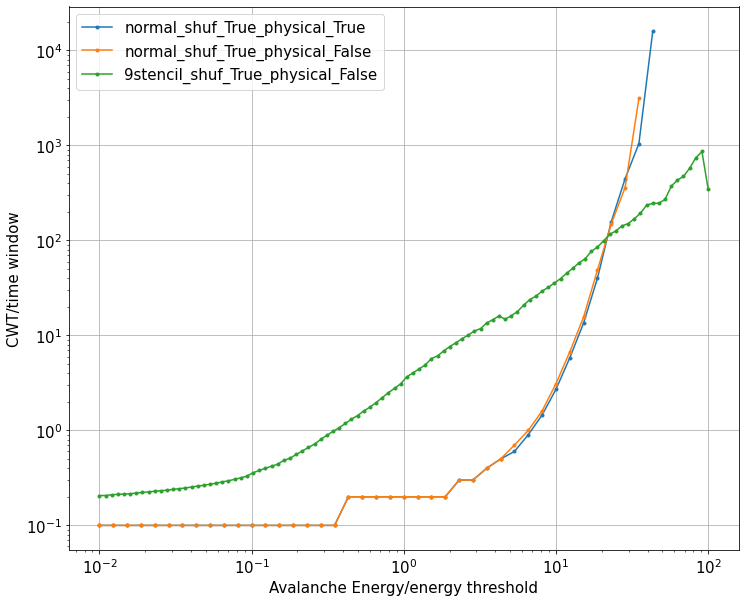

In [153]:
plt.figure()
for i in range(2):
    plt.loglog(far_spaces[0][i]/1000, far_spaces[1][i]/10, marker = '.')
plt.loglog(points*1e5, CWT_sunpy/1e5, marker = '.')
plt.ylabel('CWT/time window', fontsize = 15)
plt.xlabel('Avalanche Energy/energy threshold', fontsize = 15)
# plt.xlim(1e-4, 1e1)
# plt.ylim(1e-2, 1e2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(legend_names[4:10]+ ['Sun'], fontsize = 15)
plt.grid()

# All

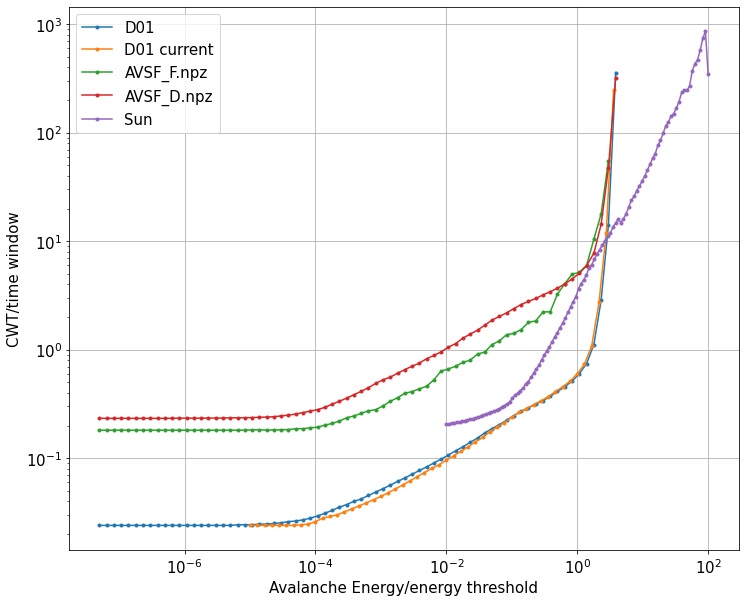

In [19]:
plt.figure()
plt.loglog(E_space1/2e6, CWT_space1/3e3, marker = '.')
plt.loglog(E_space2/1e4, CWT_space2/3e3, marker = '.')
for i in range(2):
    plt.loglog(far_spaces[0][i]/2e6, far_spaces[1][i]/3e3, marker = '.')
plt.loglog(points*1e5, CWT_sunpy/1e5, marker = '.')
plt.ylabel('CWT/time window', fontsize = 15)
plt.xlabel('Avalanche Energy/energy threshold', fontsize = 15)
# plt.xlim(1e-4, 1e1)
# plt.ylim(1e-2, 1e2)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['D01', 'D01 current']+ names+['Sun'], fontsize = 15)
plt.grid()